# Assingment Lab 2 - Nicolas Duboc

## Problem Accuracy 

### Functions from terror2.py

In [2]:
import matplotlib.pyplot as plt
from lab2_functions import euler, leapfrog, runge, midpoint
import numpy as np

# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
    'midpoint': midpoint
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp

### feuler

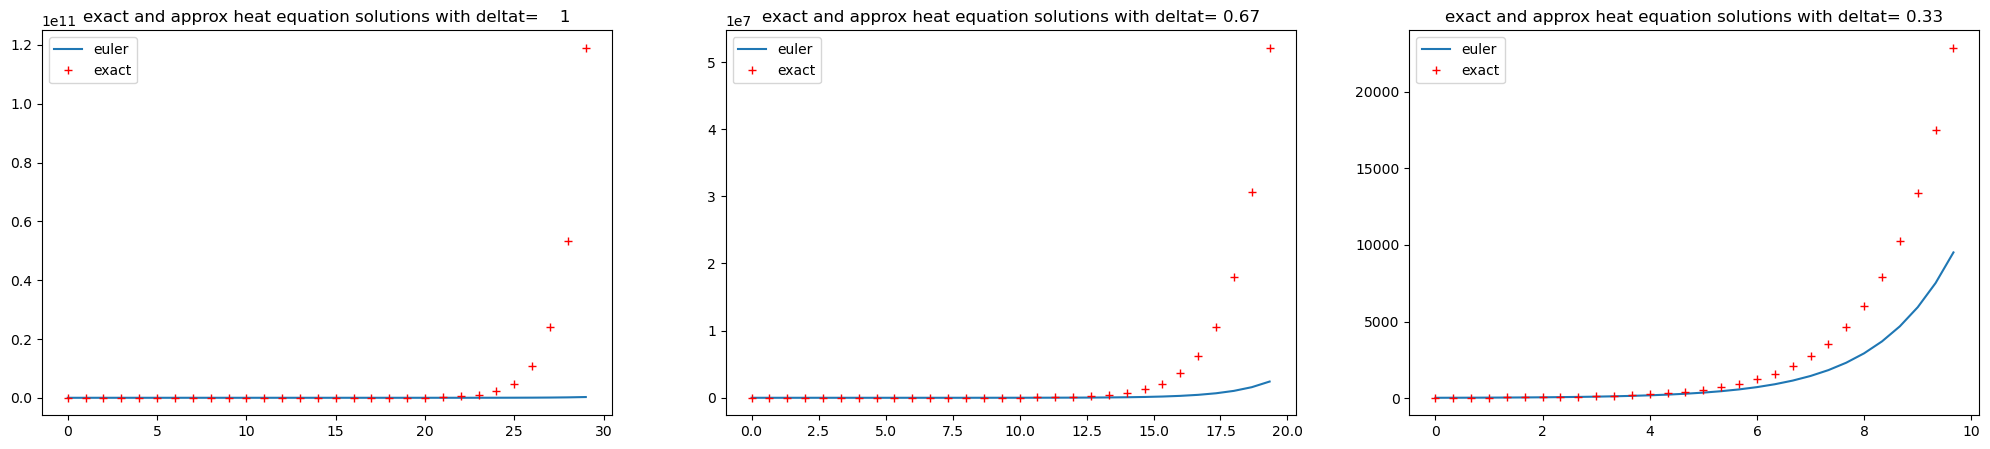

In [36]:



    
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(25, 5))
#keep_curves = dict()
# fun_list = ['leapfrog','euler', 'runge']
    #
    # add a curve for each function in fun_list
    #
# for fun_choice in fun_list:
#    approxTime, approxTemp = eval_fun(fun_choice, default_args)
    # ax1.plot(approxTime, approxTemp, label=fun_choice)
#    keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
tends = [30,20,10]
Ta = 20
To = 30
theLambda = 0.8
npts = 30

default_args1 = dict(Ta=Ta,
                    To=To,
                    tend=30,
                    theLambda=theLambda,
                    npts=npts)
default_args2 = dict(Ta=Ta,
                    To=To,
                    tend=20,
                    theLambda=theLambda,
                    npts=npts)

default_args3 = dict(Ta=Ta,
                    To=To,
                    tend=10,
                    theLambda=theLambda,
                    npts=npts)
approxtime1, approxTemp1 = eval_fun('euler',default_args1)
approxtime2, approxTemp2 = eval_fun('euler',default_args2)
approxtime3, approxTemp3 = eval_fun('euler',default_args3)

ax1.plot(approxtime1,approxTemp1,label = 'euler')
ax2.plot(approxtime2,approxTemp2,label = 'euler')
ax3.plot(approxtime3,approxTemp3,label = 'euler')

exactTime1 = np.empty_like(approxtime1)
exactTemp1 = np.empty_like(exactTime1)
exactTime2 = np.empty_like(approxtime2)
exactTemp2 = np.empty_like(exactTime2)
exactTime3 = np.empty_like(approxtime3)
exactTemp3 = np.empty_like(exactTime3)

for i in range(npts):
    exactTime1[i] = default_args1['tend'] * i / npts
    exactTemp1[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime1[i])
    exactTime2[i] = default_args2['tend'] * i / npts
    exactTemp2[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime2[i])
    exactTime3[i] = default_args3['tend'] * i / npts
    exactTemp3[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime3[i])

ax1.plot(exactTime1, exactTemp1, 'r+', label='exact')
ax2.plot(exactTime2, exactTemp2, 'r+', label='exact')
ax3.plot(exactTime3, exactTemp3, 'r+', label='exact')

deltat1=default_args1['tend'] / npts
deltat2=default_args2['tend'] / npts
deltat3=default_args3['tend'] / npts
title1 = f"exact and approx heat equation solutions with deltat={deltat1:5.2g}"
title2 = f"exact and approx heat equation solutions with deltat={deltat2:5.2g}"
title3 = f"exact and approx heat equation solutions with deltat={deltat3:5.2g}"

ax1.set(title=title1)
ax1.legend(loc='best')
ax2.set(title=title2)
ax2.legend(loc='best')
ax3.set(title=title3)
ax3.legend(loc='best')

plt.savefig('euler.png')
